# Efficient Frontier Part 2

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk
import numpy as np
import pandas as pd

ind = rk.get_ind_returns()
er = rk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [16]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [17]:
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [18]:
rk.portfolio_return(weights, er[l])

0.19511097196038385

In [19]:
rk.portfolio_vol(weights, cov.loc[l, l])

0.055059195776437045

# 2 Asset Frontier

In [20]:
l = ["Games", "Fin"]

In [21]:
n_points = 20

weights = [np.array([w, 1-w]) for w in np.linspace(0,1, n_points)]

In [22]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [23]:
len(weights)

20

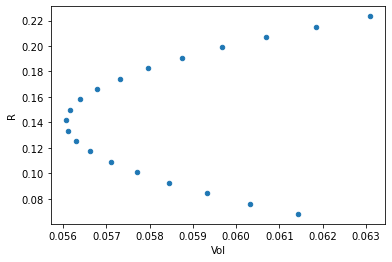

In [25]:
rets = [rk.portfolio_return(w, er[l]) for w in weights]
vols = [rk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.scatter(x='Vol', y="R")

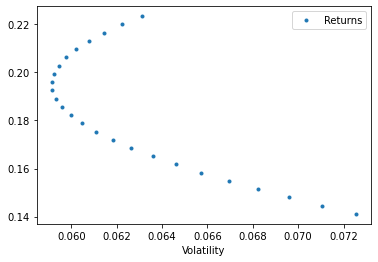

In [29]:
l = ["Fin", "Beer"]
rk.plot_ef2(25, er[l], cov.loc[l,l], style=".")